In [12]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd
import string

In [13]:
dt = pd.read_json('News_Category_Dataset_v2.json',lines = True)

In [14]:
dt.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
r = dt['category'].value_counts()
r.reset_index

In [16]:
categories=[]
for r1 in r.index:
    categories.append(str(r1))

Text(0, 0.5, 'Count')

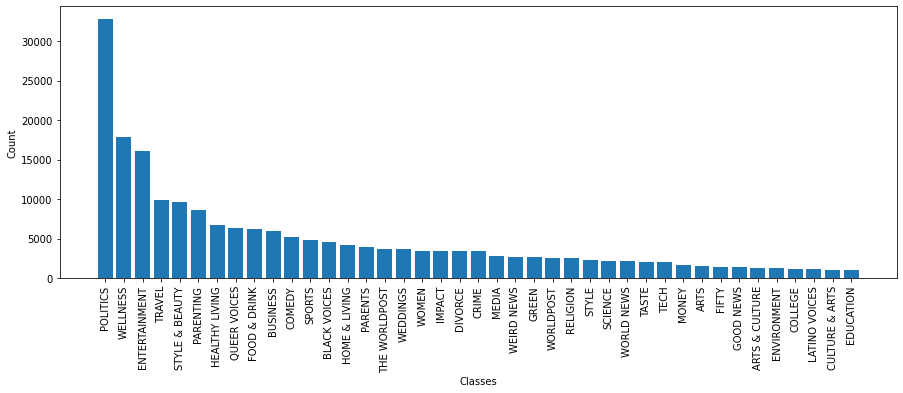

In [18]:
reslut = dt['category'].value_counts()
plt.figure(figsize=(15, 5))
plt.bar(categories,reslut)
plt.xticks(categories,rotation ='vertical')
plt.xlabel('Classes')
plt.ylabel('Count')

In [19]:
from numpy.random import RandomState
rng = RandomState()

train = dt.sample(frac=0.6, random_state=rng)
test = dt.loc[~dt.index.isin(train.index)]

In [20]:
test = test.sample(frac=0.5, random_state=rng)
val = test.loc[~test.index.isin(train.index)]

In [21]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)
val = pd.DataFrame(val)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120512 entries, 131273 to 142778
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           120512 non-null  object        
 1   headline           120512 non-null  object        
 2   authors            120512 non-null  object        
 3   link               120512 non-null  object        
 4   short_description  120512 non-null  object        
 5   date               120512 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 6.4+ MB


In [135]:
total_probs ={}
total_rows = 120512
indexes = train.groupby('category').count().index
for i in range(len(indexes)):
    total_probs[indexes[i]] = train.groupby('category').count().iloc[i,0]/total_rows

In [147]:
category_dict = {sec:{} for sec in categories}

In [138]:
sw_list =["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
punct = str.maketrans('', '', string.punctuation)

In [148]:
def prob(x):
    c1 = str(x['category'])
    for w1 in x['headline'].split(" "):
        w1 = str(w1).lower()
        w1 = w1.translate(punct)
        if w1 not in sw_list:
            if w1 in category_dict[c1]:
                category_dict[c1][w1] += 1
            else:
                category_dict[c1][w1] = 1
    for w2 in x['short_description'].split(" "):
        w2 = str(w2).lower() 
        w2 = w2.translate(punct)
        if w2 not in sw_list:
            if w2 in category_dict[c1]:
                category_dict[c1][w2] += 1
            else:
                category_dict[c1][w2] = 1

In [149]:
train.apply(lambda x:prob(x),axis=1)

131273    None
197016    None
148936    None
107999    None
40799     None
          ... 
178922    None
97818     None
65334     None
102184    None
142778    None
Length: 120512, dtype: object

In [150]:
words_num =[]
def smoothing(x1):
    for w1 in x1['headline'].split(" "):
        w1 = str(w1).lower() 
        w1 = w1.translate(punct)
        if w1 not in sw_list:
            words_num.append(w1)
    for w in x1['short_description'].split(" "):
        w = str(w).lower() 
        w = w.translate(punct)
        if w not in sw_list:
            words_num.append(w)

    for word in words_num:
        for c in categories:
            if word in category_dict[c]:
                pass
            else:
                for c in categories:
                    try:
                        category_dict[c][word] += 1
                    except KeyError:
                        category_dict[c][word] = 1
    words_num.clear()   

In [151]:
train.apply(lambda x1:smoothing(x1),axis=1)

131273    None
197016    None
148936    None
107999    None
40799     None
          ... 
178922    None
97818     None
65334     None
102184    None
142778    None
Length: 120512, dtype: object

In [152]:
total = 0
sums_dict = {}
for c in categories:
    sums_dict[c] = sum(category_dict[c].values())
    total += sum(category_dict[c].values())
print(total)
sums_dict

5619618


{'POLITICS': 372591,
 'WELLNESS': 277251,
 'ENTERTAINMENT': 215089,
 'TRAVEL': 195749,
 'STYLE & BEAUTY': 191566,
 'PARENTING': 180779,
 'HEALTHY LIVING': 145101,
 'QUEER VOICES': 149305,
 'FOOD & DRINK': 141507,
 'BUSINESS': 149543,
 'COMEDY': 131440,
 'SPORTS': 132648,
 'BLACK VOICES': 134661,
 'HOME & LIVING': 129749,
 'PARENTS': 124361,
 'THE WORLDPOST': 126169,
 'WEDDINGS': 130630,
 'WOMEN': 121615,
 'IMPACT': 128420,
 'DIVORCE': 125316,
 'CRIME': 122306,
 'MEDIA': 117485,
 'WEIRD NEWS': 110144,
 'GREEN': 118108,
 'WORLDPOST': 118014,
 'RELIGION': 115449,
 'STYLE': 106465,
 'SCIENCE': 112626,
 'WORLD NEWS': 114041,
 'TASTE': 108656,
 'TECH': 111147,
 'MONEY': 111482,
 'ARTS': 107809,
 'FIFTY': 108177,
 'GOOD NEWS': 103320,
 'ARTS & CULTURE': 104556,
 'ENVIRONMENT': 108767,
 'COLLEGE': 104410,
 'LATINO VOICES': 103545,
 'CULTURE & ARTS': 105612,
 'EDUCATION': 104009}

In [153]:
words_num =[]
num_dict = {sec:{} for sec in train['headline']}
def numerator(x1):
    nume = 1
    for w1 in x1['headline'].split(" "):
        w1 = str(w1).lower() 
        w1 = w1.translate(punct)
        if w1 not in sw_list:
            words_num.append(w1)
    for w in x1['short_description'].split(" "):
        w = str(w).lower() 
        w = w.translate(punct)
        if w not in sw_list:
            words_num.append(w)

    for c in categories:
        for word in words_num:
            nume *= category_dict[c][word]/sums_dict[c]
        num_dict[x1['headline']][c] = nume
        nume = 1
    words_num.clear()

In [154]:
train.apply(lambda x1:numerator(x1),axis=1)

131273    None
197016    None
148936    None
107999    None
40799     None
          ... 
178922    None
97818     None
65334     None
102184    None
142778    None
Length: 120512, dtype: object

In [155]:
denom_dict ={}

def denominator(x1):
    d = 0
    for c in categories:
        d += (total_probs[c])*num_dict[x1['headline']][c]
    denom_dict[x1['headline']] = d

In [156]:
train.apply(lambda x1:denominator(x1),axis=1)

131273    None
197016    None
148936    None
107999    None
40799     None
          ... 
178922    None
97818     None
65334     None
102184    None
142778    None
Length: 120512, dtype: object

In [157]:
final_prob = {sec:{} for sec in train['headline']}
def NBC(x1):
    for c in categories:
        final_prob[x1['headline']][c] = (total_probs[c])*num_dict[x1['headline']][c]/denom_dict[x1['headline']]

In [159]:
train.apply(lambda x1:NBC(x1),axis=1)

/var/folders/sz/57t4_wnd57s3qt84x7drdp7c0000gn/T/ipykernel_3398/2918355394.py:4: RuntimeWarning: invalid value encountered in double_scalars
  final_prob[x1['headline']][c] = (total_probs[c])*num_dict[x1['headline']][c]/denom_dict[x1['headline']]


131273    None
197016    None
148936    None
107999    None
40799     None
          ... 
178922    None
97818     None
65334     None
102184    None
142778    None
Length: 120512, dtype: object

In [160]:
list_acc=[]
def acc(x1):
    if str(x1['category']) == max(final_prob[x1['headline']], key=final_prob[x1['headline']].get):
        list_acc.append(1)

In [161]:
train.apply(lambda x1:acc(x1),axis=1)

131273    None
197016    None
148936    None
107999    None
40799     None
          ... 
178922    None
97818     None
65334     None
102184    None
142778    None
Length: 120512, dtype: object

In [164]:
train_acc = 100*len(list_acc)/total_rows
print(f'The accuracy of training set is: {train_acc} %')

The accuracy of training set is: 63.379580456718 %


In [174]:
words_num =[]
num_dict = {sec:{} for sec in val['headline']}

def jms_numerator(x1):
    a = 0.5;d1 = 0;nume = 1
    for w1 in x1['headline'].split(" "):
        w1 = str(w1).lower() 
        w1 = w1.translate(punct)
        if w1 not in sw_list:
            words_num.append(w1)
    for w in x1['short_description'].split(" "):
        w = str(w).lower() 
        w = w.translate(punct)
        if w not in sw_list:
            words_num.append(w)

    for c in categories:
        for word in words_num:
            for c1 in categories:
                try:
                    d1 += category_dict[c1][word]
                except KeyError:
                    pass
            d1 = d1/total
            try:
                nume *= ((1-a)*category_dict[c][word]/sums_dict[c]) + a*d1
            except KeyError:
                nume *= a*d1
            d=0
        num_dict[x1['headline']][c] = nume
        nume = 1
    words_num.clear()

In [175]:
val.apply(lambda x1:jms_numerator(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [181]:
val.apply(lambda x1:smoothing(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [182]:
num_dict = {sec:{} for sec in val['headline']}
val.apply(lambda x1:numerator(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [183]:
val.apply(lambda x1:denominator(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [184]:
final_prob = {sec:{} for sec in val['headline']}
val.apply(lambda x1:NBC(x1),axis=1)

/var/folders/sz/57t4_wnd57s3qt84x7drdp7c0000gn/T/ipykernel_3398/2918355394.py:4: RuntimeWarning: invalid value encountered in double_scalars
  final_prob[x1['headline']][c] = (total_probs[c])*num_dict[x1['headline']][c]/denom_dict[x1['headline']]


7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [185]:
list_acc = []
val.apply(lambda x1:acc(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [173]:
val_JMS_acc1 = 100*len(list_acc)/40170
print(f'The accuracy of validation set with JMS(λ=0.1) is: {val_JMS_acc1} %')

The accuracy of validation set with JMS(λ=0.1) is: 52.45705750560119 %


In [179]:
val_JMS_acc2 = 100*len(list_acc)/40170
print(f'The accuracy of validation set with JMS(λ=0.5) is: {val_JMS_acc2} %')

The accuracy of validation set with JMS(λ=0.5) is: 51.83719193427931 %


In [187]:
val_LS_acc = 100*len(list_acc)/40170
print(f'The accuracy of validation set with LS is: {val_LS_acc} %')

The accuracy of validation set with LS is: 53.13169031615634 %


In [188]:
test.apply(lambda x1:jms_numerator(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [195]:
test.apply(lambda x1:denominator(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [196]:
final_prob = {sec:{} for sec in test['headline']}
test.apply(lambda x1:NBC(x1),axis=1)

/var/folders/sz/57t4_wnd57s3qt84x7drdp7c0000gn/T/ipykernel_3398/2918355394.py:4: RuntimeWarning: invalid value encountered in double_scalars
  final_prob[x1['headline']][c] = (total_probs[c])*num_dict[x1['headline']][c]/denom_dict[x1['headline']]


7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [197]:
list_acc = []
test.apply(lambda x1:acc(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [192]:
test_JMS_acc = 100*len(list_acc)/40170
print(f'The accuracy of test set with JMS(λ=0.5) is: {test_JMS_acc} %')

The accuracy of test set with JMS(λ=0.5) is: 52.2504356484939 %


In [193]:
test.apply(lambda x1:smoothing(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [194]:
num_dict = {sec:{} for sec in test['headline']}
test.apply(lambda x1:numerator(x1),axis=1)

7017      None
82059     None
70247     None
51998     None
114972    None
          ... 
54156     None
39989     None
179620    None
53843     None
57905     None
Length: 40170, dtype: object

In [198]:
test_LS_acc = 100*len(list_acc)/40170
print(f'The accuracy of test set with LS is: {test_LS_acc} %')

The accuracy of test set with LS is: 53.13169031615634 %


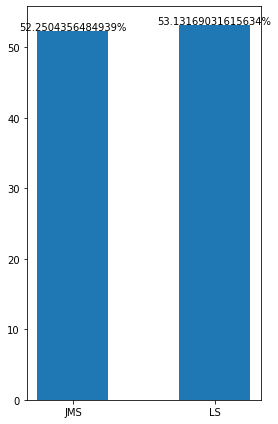

In [228]:
plt.rcParams["figure.figsize"] = [4, 6]
plt.rcParams["figure.autolayout"] = True

x = ['JMS','LS']
y = [test_JMS_acc,test_LS_acc]

width = 0.5
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')

plt.show()